In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import util
import pandas as pd

In [17]:
alpha = [2,3,2]
beta  = [3,3,3]
world = [0,1,1]
possible_priors = np.linspace(0,1,100)
pp = possible_priors+0.01

alpha = [x + y for x, y in zip(alpha, world)]
print("a:", alpha)
beta = [x - y + 1 for x, y in zip(beta, world)]
print("b:", beta)
#priors = [a/(a+b) for a, b in zip(self.alpha, self.beta)]
prior_dist = [sp.beta.cdf(x=possible_priors+.001, a=alpha[i], b=beta[i]) - sp.beta.cdf(x=possible_priors, a=alpha[i], b=beta[i]) for i in range(3)]
print(max(prior_dist[0]))
#prior = sp.beta.cdf(x=pp, a=alpha, b=beta) - sp.beta.cdf(x=possible_priors, a=alpha, b=beta)
#print(max(prior))
likelihood_dist = [sp.binom.pmf(k=alpha[i], n=len(world)+2, p=possible_priors) for i in range(3)]
like = max(likelihood_dist[0])
print(like)
posterior_dist = [prior_dist[i]*likelihood_dist[i] for i in range(len(prior_dist))]
norm_posterior_dist = [p/sum(p) for p in posterior_dist]
print(norm_posterior_dist)
world_pred = [max(norm_posterior_dist[i]) for i in range(3)]
#normalized_posterior = posterior / np.sum(posterior)
# print(normalized_posterior)
#self.world_pred = [max(normalized_posterior)]
print("pred:", world_pred)

a: [2, 4, 3]
b: [4, 3, 3]
0.002109168337549705
0.3455413650590288
pred: [0.027591089669431086, 0.029645826696580422, 0.026282350493021283]


In [9]:
from world import World 

In [10]:
m_m_world = World(state_size =1, time = 10, agent=["dummy", "bayes"], memory=[10, 10], behav_control=[1, 1])

m_m_world.create_agents()
m_m_world.run()
agents = m_m_world.get_agents()
errors = m_m_world.get_errors()
preds = m_m_world.get_pred()
priors = m_m_world.get_behav_priors()
costs = m_m_world.get_costs()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

a: [3]
b: [2]
0.0017777737747777245
0.0017777737747777245
pred: [0.30838071109402676]
a: [4.0]
b: [2.0]
0.0020904638364149797
0.0020904638364149797
pred: [0.41930228958221644]
a: [5.0]
b: [2.0]
0.0024404421524109043
0.0024404421524109043
pred: [0.5268168871658054]
a: [6.0]
b: [2.0]
0.0026590788324450942
0.0026590788324450942
pred: [0.6194817530852403]
a: [7.0]
b: [2.0]
0.0030657409719264672
0.0030657409719264672
pred: [0.6970692867765452]
a: [8.0]
b: [2.0]
0.0035056740477159565
0.0035056740477159565
pred: [0.7607221475395891]
a: [9.0]
b: [2.0]
0.003897384005324689
0.003897384005324689
pred: [0.8121672538128298]
a: [10.0]
b: [2.0]
0.004236576685245463
0.004236576685245463
pred: [0.8532776681064643]
a: [11.0]
b: [2.0]
0.004521557533890497
0.004521557533890497
pred: [0.8858431332569262]
a: [12.0]
b: [2.0]
0.0047525918359366814
0.0047525918359366814
pred: [0.9114630784902822]


In [6]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Dummy")
plt.show()

NameError: name 'plt' is not defined

[3, 2, 2, 2, 3, 3, 3, 3, 2, 2]
[2, 3, 3, 3, 2, 2, 2, 2, 3, 3]
[0.028418638575201376, 0.02209353727808027, 0.02209353727808027, 0.02209353727808027, 0.028418638575201376, 0.028418638575201376, 0.028418638575201376, 0.028418638575201376, 0.02209353727808027, 0.02209353727808027]
[4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0]
[2.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0]
[0.03570156643660925, 0.025605849716709393, 0.025605849716709393, 0.025605849716709393, 0.03570156643660925, 0.03570156643660925, 0.03570156643660925, 0.03570156643660925, 0.025605849716709393, 0.025605849716709393]
[5.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 2.0, 2.0]
[2.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0]
[0.043087233792192314, 0.029643744609164368, 0.029643744609164368, 0.029643744609164368, 0.043087233792192314, 0.043087233792192314, 0.043087233792192314, 0.043087233792192314, 0.029643744609164368, 0.029643744609164368]
[6.0, 2.0, 2.0, 2.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0]
[2.0, 6.0, 6.0, 6.0, 2.0, 2.0,

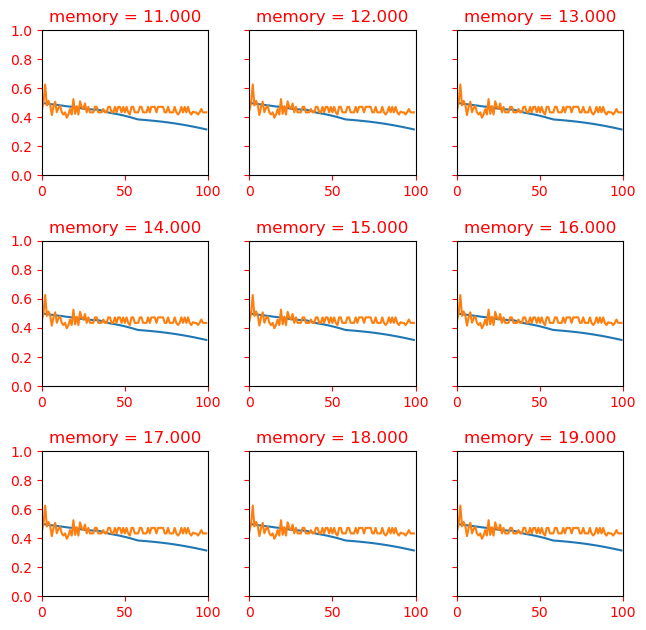

In [20]:
w = 2.5; h = 2.5
ncols = 3
nrows = 3
param_vals = [i for i in range(11, 20)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["bayes", "dummy"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied")
plt.show()